In [1]:
from PyHeisenberg import HeisenbergGraph, DataAnalyzer
import numpy as np

In [8]:
testGraph = HeisenbergGraph(
    spinInteractions={
        (0, 1): [0.5, 0.2, 0.7],
        (1, 2): [0.6, 0.9, 0.2],
        (0, 2): [0.7, 0.4, 0.1],
        # (1, 2): [1, 1, 1],
        # (2, 3): [1, 1, 1],
        # (3, 0): [1, 1, 1],
    },
    externalField={
        0: [1.0, 0.0, 1.0],
        1: [1.0, 0.8, 1.0],
        2: [0.3, 0.7, 0.2],
        # 3: [0, 0, 0],
    },
    localSimulation=True,
    backendName='qasm_simulator'
    # initialState=np.array([1, 0, 0, 0])
)
testAnalyzer = DataAnalyzer(spinGraph=testGraph)

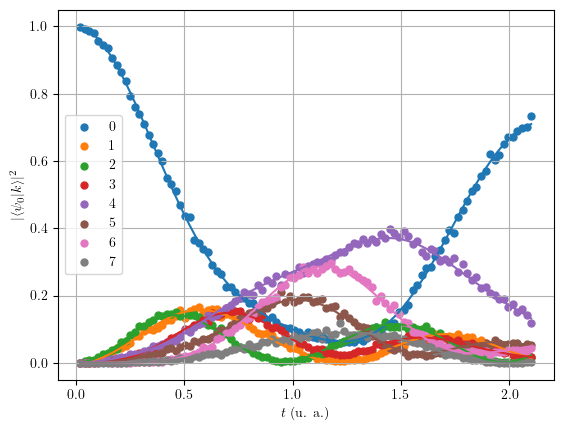

In [9]:
testAnalyzer.comparativeEvolution(
    STEPS=100,
    t=2.1
)

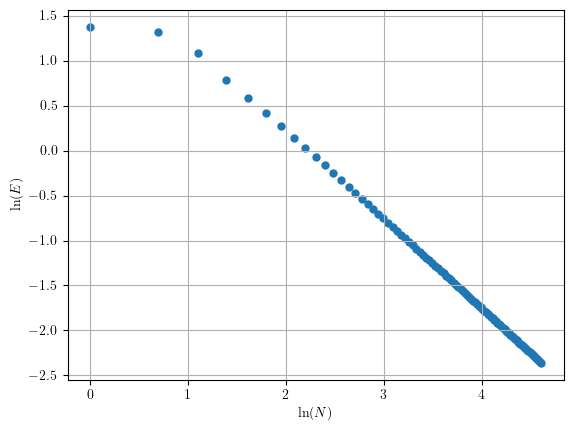

In [10]:
stepsExponent, _, _, _, _ = testAnalyzer.unitaryErrorStepsPlot(
    MAX_STEPS=100, 
    t=2.1
)

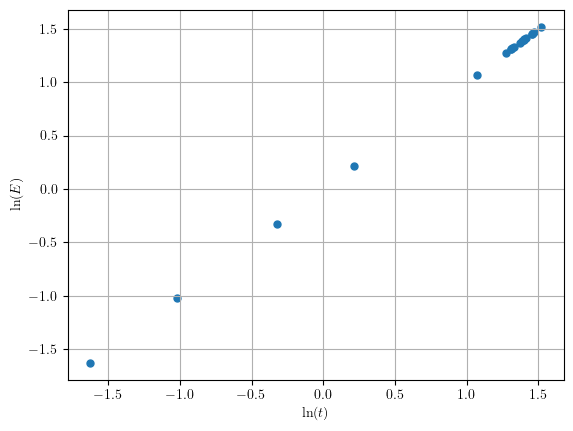

In [11]:
timesExponent, _, _, _, _ = testAnalyzer.unitaryErrorTimePlot(
    STEPS=80, 
    times=np.logspace(0.5,4.5,num=20)
)

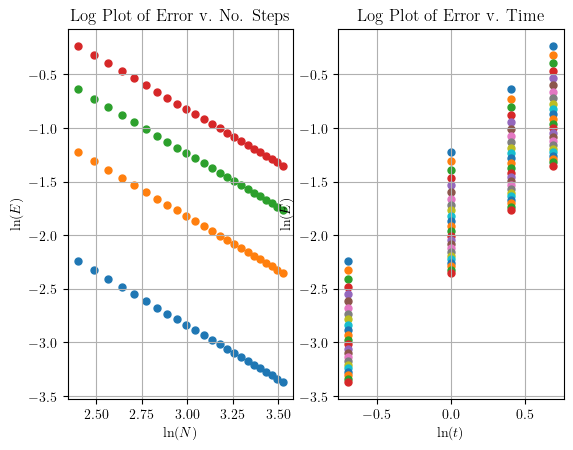

In [12]:
_ = testAnalyzer.unitaryErrorMixedPlot(
    STEPS=np.array([idx+1 for idx in range(10,34)]),
    times=np.array([0.5, 1.0, 1.5, 2.0])
)

In [13]:
stepsExponents, timeExponents = testAnalyzer.unitaryErrorExponents(
    STEPS=np.array([idx+1 for idx in range(10, 34)]),
    times=np.array([0.5, 1.0, 1.5, 2.0])
)

In [14]:
print('Mean steps exponent: {0:.4f}'.format(np.mean(stepsExponents)))
print('Mean steps std: {0:.4f}'.format(np.std(stepsExponents)))
print('Mean times exponent: {0:.4f}'.format(np.mean(timeExponents)))
print('Mean times std: {0:.4f}'.format(np.std(timeExponents)))

Mean steps exponent: -0.9975
Mean steps std: 0.0034
Mean times exponent: 1.4546
Mean times std: 0.0017
